In [22]:

with open (r"noc_regions.csv", "r") as fp:  #python196.33.com
    for count, line in enumerate(fp): 
        pass 
    
    
    print (f"Det finns {count + 1} länder i datan.")


Det finns 231 länder i datan.


In [23]:
import pandas as pd

df = pd.read_csv("noc_regions.csv")
df["NOC"]

0      AFG
1      AHO
2      ALB
3      ALG
4      AND
      ... 
225    YEM
226    YMD
227    YUG
228    ZAM
229    ZIM
Name: NOC, Length: 230, dtype: object

In [24]:
df2 = pd.read_csv("athlete_events.csv")

types_sport = df2["Sport"].unique()


for x in types_sport:
    count + 1
    print (x)





Basketball
Judo
Football
Tug-Of-War
Speed Skating
Cross Country Skiing
Athletics
Ice Hockey
Swimming
Badminton
Sailing
Biathlon
Gymnastics
Art Competitions
Alpine Skiing
Handball
Weightlifting
Wrestling
Luge
Water Polo
Hockey
Rowing
Bobsleigh
Fencing
Equestrianism
Shooting
Boxing
Taekwondo
Cycling
Diving
Canoeing
Tennis
Modern Pentathlon
Figure Skating
Golf
Softball
Archery
Volleyball
Synchronized Swimming
Table Tennis
Nordic Combined
Baseball
Rhythmic Gymnastics
Freestyle Skiing
Rugby Sevens
Trampolining
Beach Volleyball
Triathlon
Ski Jumping
Curling
Snowboarding
Rugby
Short Track Speed Skating
Skeleton
Lacrosse
Polo
Cricket
Racquets
Motorboating
Military Ski Patrol
Croquet
Jeu De Paume
Roque
Alpinism
Basque Pelota
Aeronautics


In [25]:

types_medal = df2["Medal"].dropna().unique()

for medal in types_medal:
    count += 1
    print(x)


Aeronautics
Aeronautics
Aeronautics


In [26]:
df2["Age"].agg(["mean","median","min","max","std"])


mean      25.556898
median    24.000000
min       10.000000
max       97.000000
std        6.393561
Name: Age, dtype: float64

In [30]:
#Vi valde frågan "vilket år samt i vilken stad OS spelades i?". 

listan = df2[["Year","City"]]

listan.drop_duplicates(inplace=True)
x = listan.sort_values("Year")

x.style.hide(axis="index")





C:\Users\SelmaMahmic-AI24GBG\AppData\Local\Temp\ipykernel_22420\4218624845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listan.drop_duplicates(inplace=True)


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<BarContainer object of 2 artists>

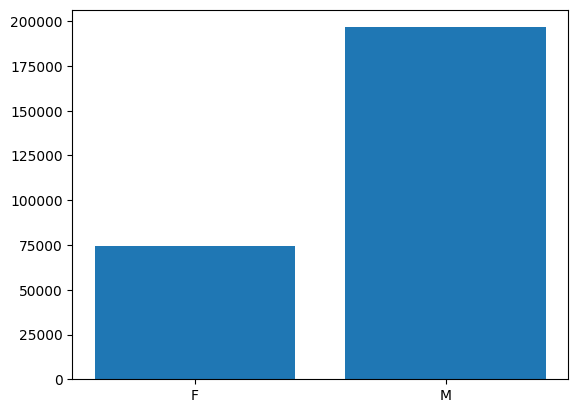

In [31]:
import matplotlib.pyplot as plt

# Diagram över könsfördelning i OS genom tiderna.

sex = df2.groupby(["Sex"]).size()

sex_total = sex.to_dict()

plt.bar(sex_total.keys(), sex_total.values())

<BarContainer object of 10 artists>

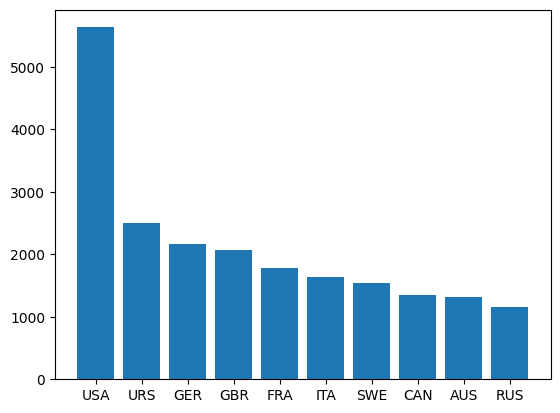

In [32]:
# Topp 10 länder som tagit flest medaljer i OS genom tiderna.

medals = df2.pivot_table(index= "NOC", columns= "Medal", aggfunc= "size")

medals2 = medals.sum(axis= 1)
medals = medals2.sort_values(ascending= False)

medals = medals.astype(int)
medals.head(10)


medals3= medals[:10]

medals_top_10 = medals3.to_dict()
plt.bar(medals_top_10.keys(), medals_top_10.values())





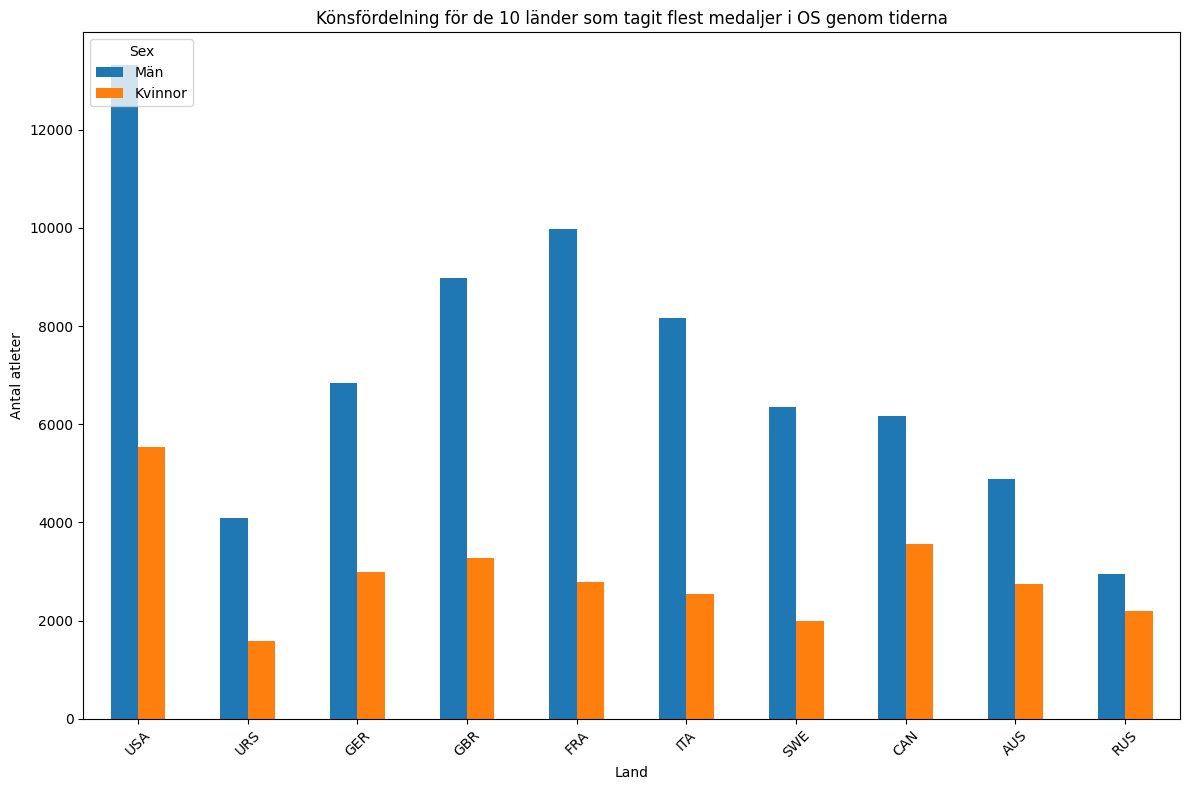

In [33]:
# Vidare efterforskning: könsfördelning mellan Top 10-länder i OS gemom tdierna.

import matplotlib.pyplot as plt

gender_distributions = []


for country in medals_top_10.keys():
   
    country_data = df2[df2["NOC"] == country]
    
    gender_distribution = country_data["Sex"].value_counts()
    gender_distribution = gender_distribution.reindex(["M", "F"],)    
    gender_distributions.append(gender_distribution)


gender_df = pd.DataFrame(gender_distributions, index=medals_top_10.keys())
gender_df.plot(kind= "bar", stacked= False, figsize=(12, 8))


plt.title("Könsfördelning för de 10 länder som tagit flest medaljer i OS genom tiderna")
plt.xlabel("Land")
plt.ylabel("Antal atleter")
plt.xticks(rotation= 45) 
plt.legend(title= "Sex", loc= "upper left", labels= ["Män", "Kvinnor"])
plt.tight_layout() 
plt.show()


### Uppgift 1 "Kanada i OS":

In [34]:
# Anomynisera alla OS-deltagares namn i DF. 

import hashlib as hl


canada_os = df2[df2["NOC"] == "CAN"]
canada_athletes = canada_os["Name"].apply(lambda x : hl.sha256(str(x).encode()).hexdigest())
canada_athletes

269       aba7d8d0992f2b3b6e46b1831df764994ff8ffbf6c898f...
270       aba7d8d0992f2b3b6e46b1831df764994ff8ffbf6c898f...
279       70df8f4a81f7f3a99f3082f342cbc5abe1a94639746d6e...
280       f88877baecbe8c235efe8ad5692bab36d2dc9e36091da0...
281       6dbe76474f9fa17f0569120a314c2fb177ec51f05996eb...
                                ...                        
270889    4addc5795374accf65ead2ca70d179d84d28730c5ac81b...
270890    4addc5795374accf65ead2ca70d179d84d28730c5ac81b...
270901    2ca90c79227f3a5bf8f1791cc94359e3ac466f5f926dd5...
271030    b2383fe9b2af798bfb60359ace2b2416cc690e725da812...
271031    b2383fe9b2af798bfb60359ace2b2416cc690e725da812...
Name: Name, Length: 9733, dtype: object

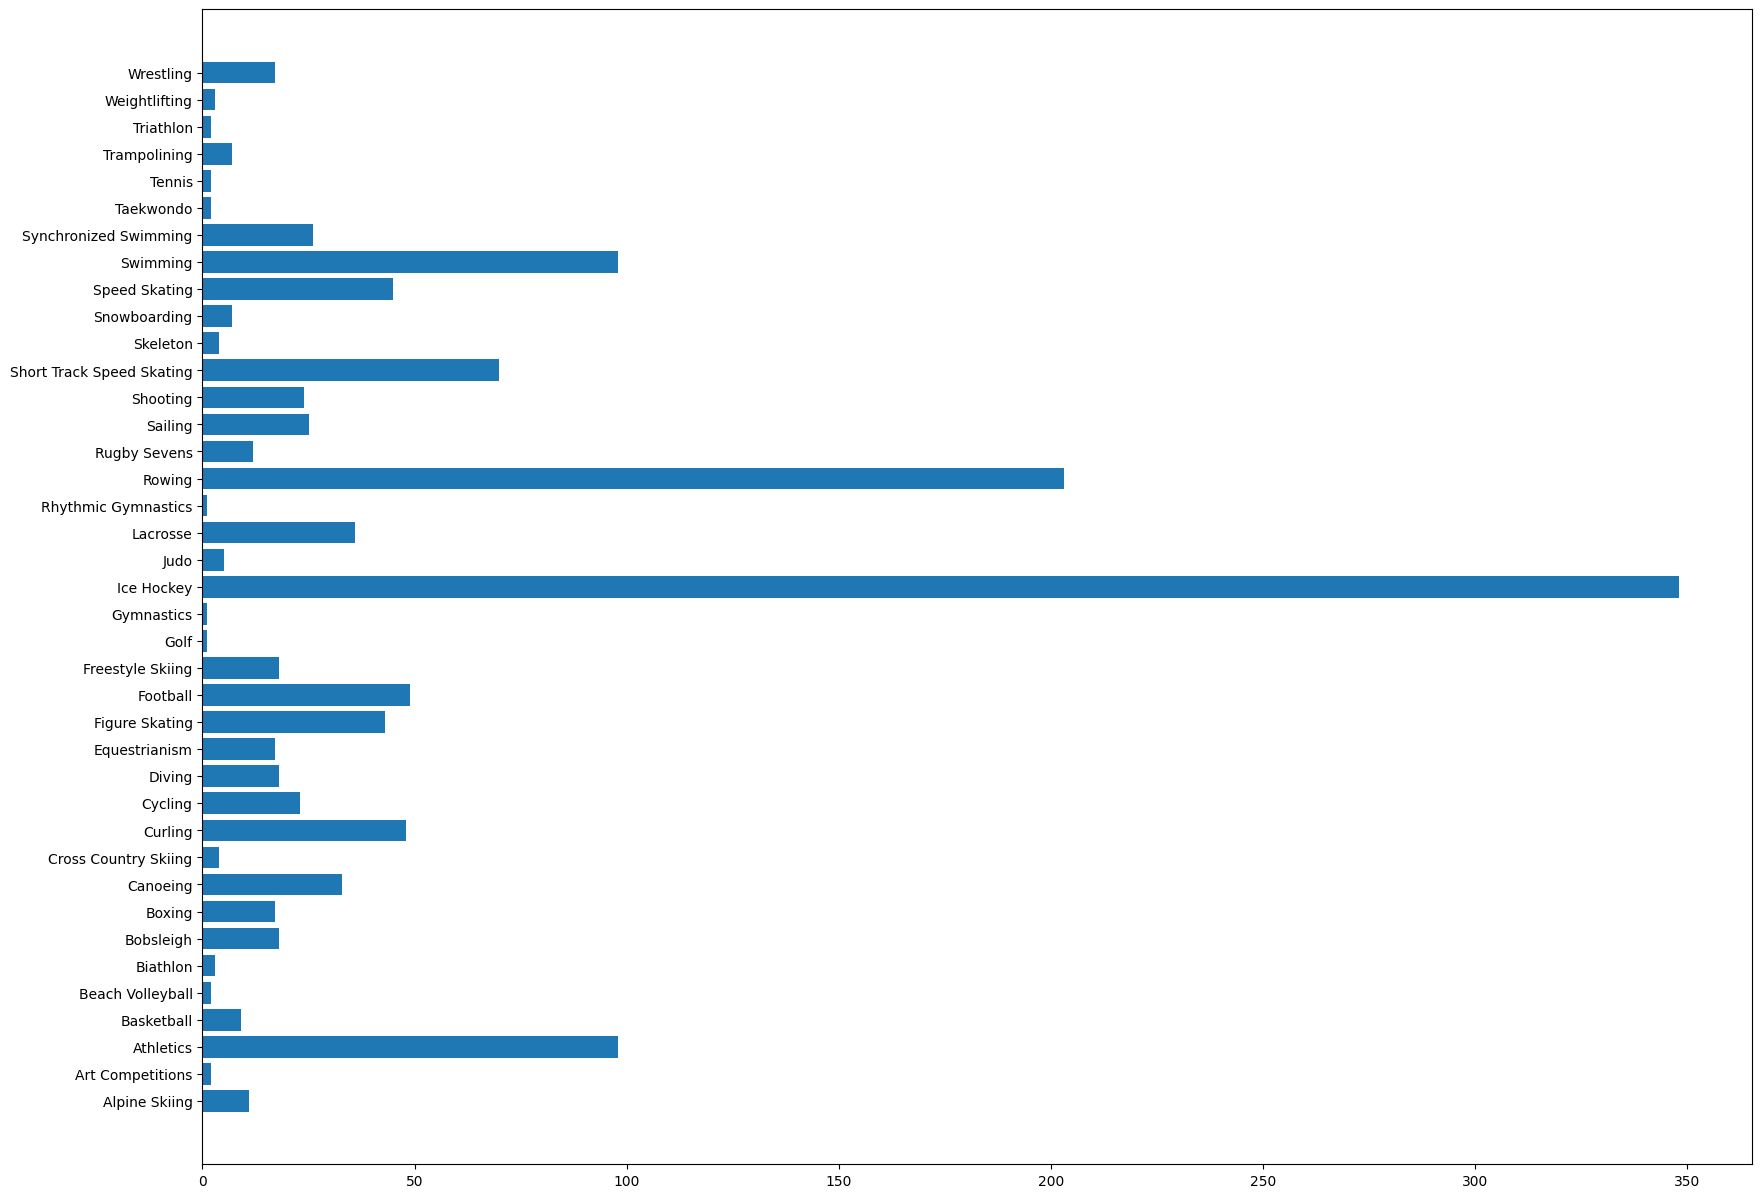

In [35]:
# Antal medlajer per gren i OS för Kanada genom tiderna.  

import matplotlib.pyplot as plt

medal_sport = canada_os.pivot_table(index = "Sport", columns= "Medal", aggfunc= "size")
number_medals1 = medal_sport.sum(axis= 1)
number_medals1.sort_values(ascending= False)
number_medals2 = number_medals1.astype(int)
number_medals = number_medals2.to_dict()

plt.figure(figsize= (20, 15))
plt.barh(list(number_medals.keys()), number_medals.values())
plt.show()


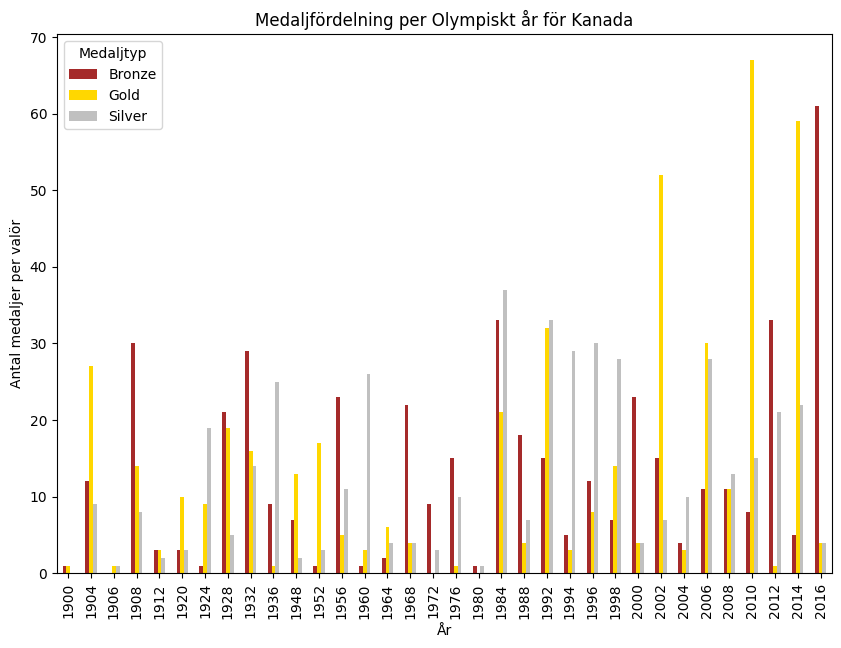

In [36]:
# Antal meldajer för Kanada per OS genom tiderna fördelat på valör. 
 
antal_medaljer = canada_os["Medal"].dropna().value_counts()
 
tabell = canada_os.pivot_table(index= "Year", columns= "Medal", aggfunc= "size")
 
tabell.dropna()
 
 
# Stapeldiagram för medaljfördelning per olypmiskt år.

tabell.plot(kind= "bar", stacked= False, color= ["brown", "Gold", "Silver"], figsize= (10, 7))
plt.xlabel("År")
plt.ylabel("Antal medaljer per valör")
plt.title("Medaljfördelning per Olympiskt år för Kanada")
plt.legend(title= "Medaljtyp")
plt.show()
 

C:\Users\SelmaMahmic-AI24GBG\AppData\Local\Temp\ipykernel_22420\3457709780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_os.drop_duplicates(subset= "ID", inplace= True)


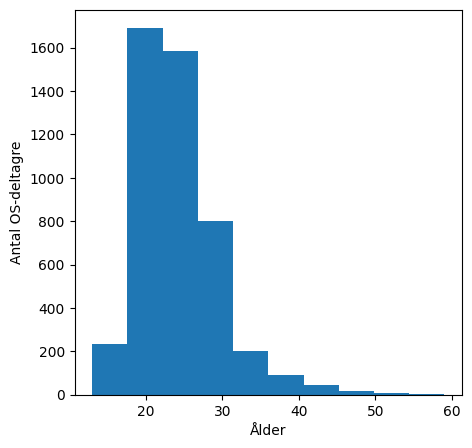

In [37]:
import numpy as np

# Ta bort dubletter. 
 
canada_os.drop_duplicates(subset= "ID", inplace= True)
 
age = canada_os["Age"]

# age.mean() # bara för att se om det stämmer, vilket gav oss medelvärdet 24år
 
 
plt.figure(figsize= (5,5))
plt.xlabel("Ålder")
plt.ylabel("Antal OS-deltagre")
plt.hist(age)
plt.show()

In [39]:
sports = df2[df2["Sport"].isin(["Swimming", "Tennis", "Football", "Gymnastics"])&df2["NOC"].isin(["CAN", "USA", "SWE", "CHN", "GER"])]
 
four_sports = sports.pivot_table(index = "Medal", columns= ["Sport", "NOC"], aggfunc= "size")
four_sports
 
 

Sport  Football                         Gymnastics                          \
NOC         CAN   CHN   GER   SWE   USA        CAN   CHN   GER   SWE   USA   
Medal                                                                        
Bronze     36.0   NaN  69.0  30.0  12.0        NaN  30.0  19.0   1.0  63.0   
Gold       13.0   NaN  18.0  12.0  66.0        1.0  45.0  46.0  95.0  60.0   
Silver      NaN  15.0  17.0  18.0  24.0        NaN  34.0  12.0   7.0  71.0   

Sport  Swimming                          Tennis                       
NOC         CAN   CHN   GER   SWE    USA    CAN  CHN  GER  SWE   USA  
Medal                                                                 
Bronze     65.0  23.0  80.0  35.0  175.0    NaN  2.0  3.0  8.0  18.0  
Gold        8.0  13.0  17.0   9.0  649.0    2.0  2.0  5.0  NaN  34.0  
Silver     25.0  34.0  59.0  26.0  254.0    NaN  NaN  7.0  6.0  10.0

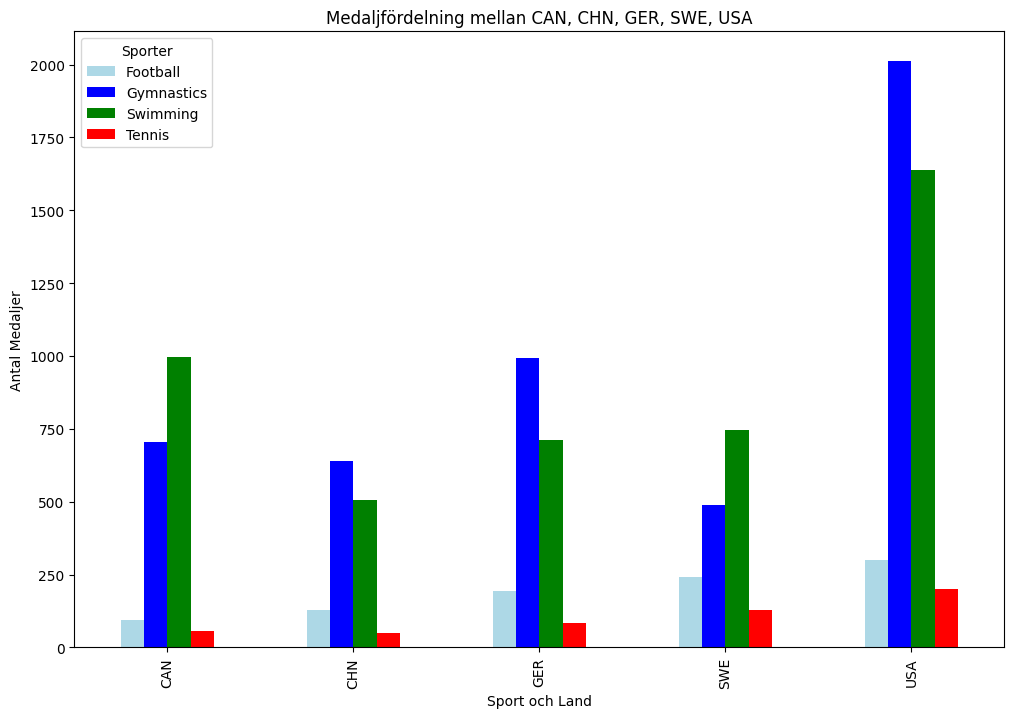

In [58]:
four_sports = sports.pivot_table(index = "NOC", columns= ["Sport"], aggfunc= "size")
four_sports.plot(kind='bar', figsize=(12, 8), color=['lightblue', 'blue', 'green', 'red'], stacked=False)
plt.xlabel("Sport och Land")
plt.ylabel("Antal Medaljer")
plt.title("Medaljfördelning mellan CAN, CHN, GER, SWE, USA")
plt.legend(title='Sporter')
plt.show()

C:\Users\SelmaMahmic-AI24GBG\AppData\Local\Temp\ipykernel_22420\3758447497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sports['Age'].fillna(sports['Age'].median(),inplace=True)
C:\Users\SelmaMahmic-AI24GBG\AppData\Local\Temp\ipykernel_22420\3758447497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports['Age'].fillna(sports['Age'

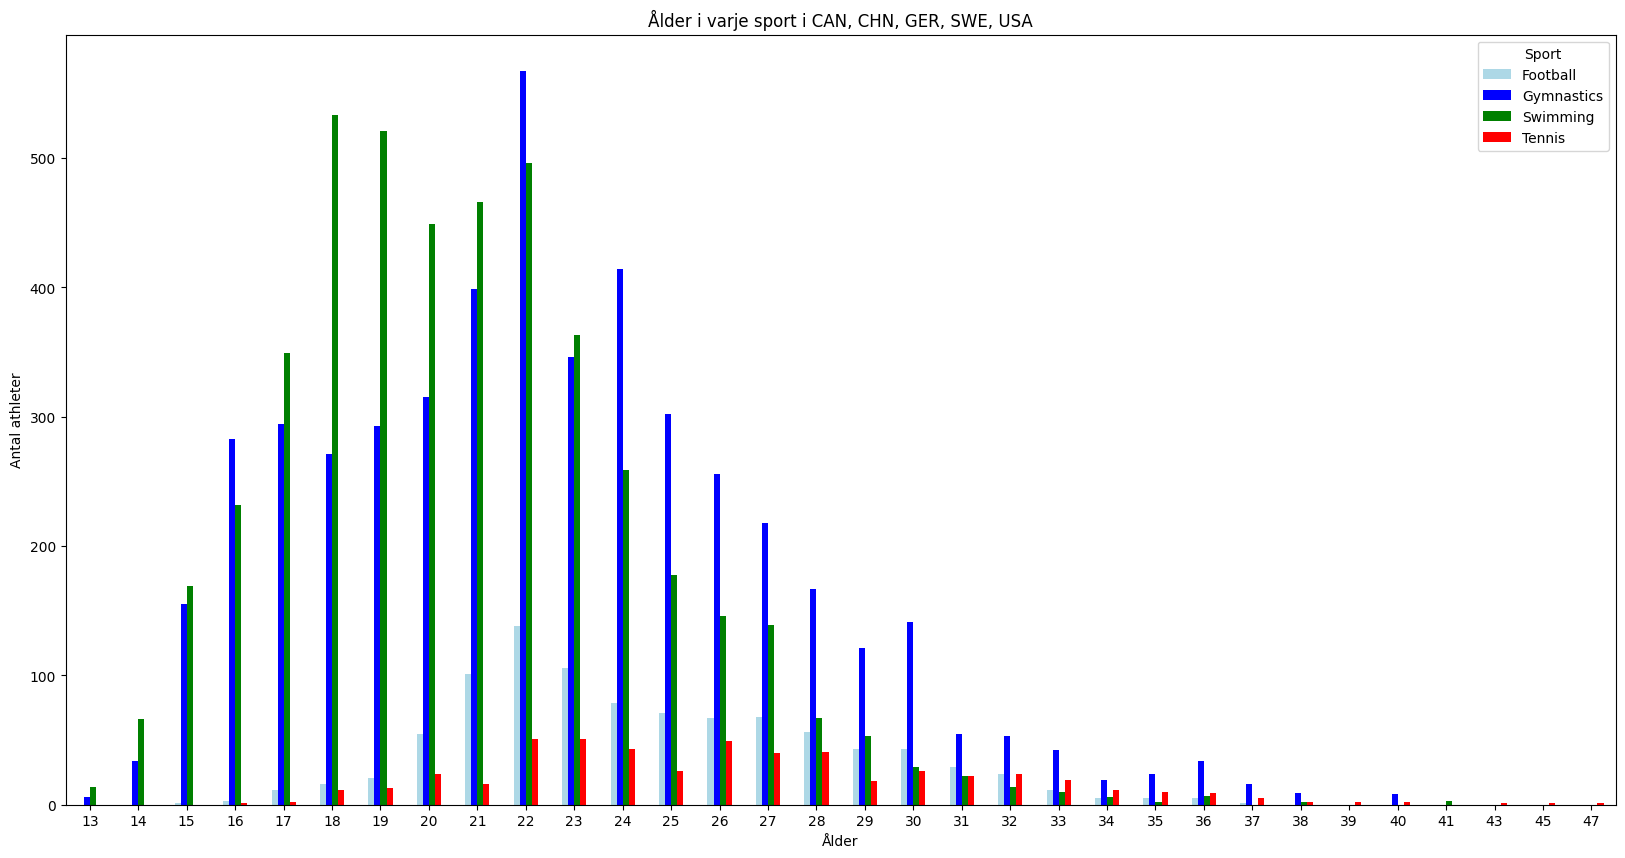

In [56]:
sports['Age'].fillna(sports['Age'].median(),inplace=True)
sports['Age'] = sports['Age'].astype(int)
 
four_sports = sports.pivot_table(index = "Age", columns= ["Sport"],aggfunc= "size")
 
four_sports.plot(kind='bar', figsize=(20, 10), color=['lightblue', 'blue', 'green', 'red'], stacked=False)
plt.ylabel("Antal athleter")
plt.xlabel("Ålder")
 
plt.title("Ålder i varje sport i CAN, CHN, GER, SWE, USA")
plt.legend(title='Sport')
plt.xticks(rotation=0)
plt.show()